---
title: "PROYECTO FINAL"
author: "Diego Guanotasig"
date: "10-17-25"
format: html
jupyter: python3
---

# TRABAJO FINAL
### Librerias

In [1]:
import pandas as pd
import requests
import altair as alt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize # tokenizacion
from nltk import pos_tag #lematizacion
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import seaborn as sns
import numpy as np

#from wordcloud import WordCloud

lemmatizer = WordNetLemmatizer()

nltk.download('stopwords') # necessary for removal of stop words
nltk.download('wordnet') # necessary for lemmatization

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dieg0AkD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dieg0AkD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Impotar datashet

In [2]:
# Lee el CSV que está en la misma carpeta
df = pd.read_csv("data/1500_tweets_con_toxicity.csv")
#sep=';',
#        encoding='latin-1')
# Muestra las primeras filas
df.head()

,tweetId,tweetUrl,content,isReply,replyTo,createdAt,authorId,authorName,authorUsername,authorVerified,...,inReplyToId,Date,time_response,account_age_days,mentions_count,hashtags_count,content_length,has_profile_picture,sentiment_polarity,toxicity_score
0,1878630970745900800,https://x.com/Pableins15/status/18786309707459...,@DanielNoboaOk @DiegoBorjaPC Lávate el hocico ...,True,DanielNoboaOk,2025-01-13 02:31:00,176948611,Pablo Balarezo,Pableins15,False,...,1878539079249547520,2025-01-12 20:26:32,364.466667,5261,2,0,309,False,0.0,0.543256
1,1904041877503984128,https://x.com/solma1201/status/190404187750398...,@DanielNoboaOk De esa arrastrada no te levanta...,True,DanielNoboaOk,2025-03-24 05:25:00,1368663286582030336,Solma1201,solma1201,False,...,1904003201143115776,2025-03-24 02:51:52,153.133333,1399,1,0,70,True,0.0,0.426917
2,1877463444649046016,https://x.com/Mediterran67794/status/187746344...,@LuisaGonzalezEc @RC5Oficial Protegiendo a los...,True,LuisaGonzalezEc,2025-01-09 21:12:00,1851005619106451712,Médico Escritor Filósofo Hermeneútico,Mediterran67794,False,...,1877158437236228352,2025-01-09 01:00:22,1211.633333,68,2,0,122,True,0.0,0.555970
3,1881356046108885248,https://x.com/ardededa/status/1881356046108885494,@DanielNoboaOk #NoboaPresidente. Todo 7!,True,DanielNoboaOk,2025-01-20 15:00:00,315799544,Denise,ardededa,False,...,1881165128185560832,2025-01-20 02:21:31,758.483333,4955,1,0,41,True,0.0,0.046615
4,1888331962063978752,https://x.com/LMarquinezm/status/1888331962063...,@slider1908 @LuisaGonzalezEc @DianaAtamaint @c...,True,slider1908,2025-02-08 20:59:00,1551883554,Luis Marquínez,LMarquinezm,False,...,1888256000085397504,2025-02-08 14:59:07,359.883333,4208,5,0,101,True,0.0,0.846027


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweetId              1500 non-null   int64  
 1   tweetUrl             1500 non-null   object 
 2   content              1500 non-null   object 
 3   isReply              1500 non-null   bool   
 4   replyTo              1490 non-null   object 
 5   createdAt            1500 non-null   object 
 6   authorId             1500 non-null   int64  
 7   authorName           1500 non-null   object 
 8   authorUsername       1500 non-null   object 
 9   authorVerified       1500 non-null   bool   
 10  authorFollowers      1500 non-null   int64  
 11  authorProfilePic     1500 non-null   object 
 12  authorJoinDate       1500 non-null   object 
 13  source               1500 non-null   object 
 14  hashtags             121 non-null    object 
 15  mentions             1499 non-null   o

# 1. Análisis Exploratorio de Datos (EDA):

### •	Analizar el dataset entregado con foco en:
#### Tipo y cantidad de variables (numéricas, categóricas, texto).

Variables numéricas (int, float).

Variables categóricas (object, category).

Variables de texto, estimadas como columnas de tipo object con longitud promedio de texto > 30 caracteres.

In [4]:
# Detectar tipos de columnas
num_vars = df.select_dtypes(include=['number']).columns
cat_vars = df.select_dtypes(include=['object', 'category']).columns
text_vars = [col for col in df.columns if df[col].dtype == 'object' and df[col].str.len().mean() > 30]

# Mostrar resultados
print("Tipos de variables en el DataFrame:\n")
print(f"Variables numéricas ({len(num_vars)}): {list(num_vars)}")
print(f"Variables categóricas ({len(cat_vars)}): {list(cat_vars)}")
print(f"Variables de texto ({len(text_vars)}): {list(text_vars)}")

# Si quieres un resumen tabular:
resumen = pd.DataFrame({
    'Tipo': ['Numéricas', 'Categóricas', 'Texto'],
    'Cantidad': [len(num_vars), len(cat_vars), len(text_vars)]
})

display(resumen)

Tipos de variables en el DataFrame:

Variables numéricas (12): ['tweetId', 'authorId', 'authorFollowers', 'conversationId', 'inReplyToId', 'time_response', 'account_age_days', 'mentions_count', 'hashtags_count', 'content_length', 'sentiment_polarity', 'toxicity_score']
Variables categóricas (12): ['tweetUrl', 'content', 'replyTo', 'createdAt', 'authorName', 'authorUsername', 'authorProfilePic', 'authorJoinDate', 'source', 'hashtags', 'mentions', 'Date']
Variables de texto (3): ['tweetUrl', 'content', 'authorProfilePic']


,Tipo,Cantidad
0,Numéricas,12
1,Categóricas,12
2,Texto,3


### * Estadísticas descriptivas (mínimos, máximos, media, mediana, distribución).


Estadísticas descriptivas de las variables numéricas:



,min,max,mean,median,std
tweetId,1.876011e+18,1.922145e+18,1.893421e+18,1.887876e+18,1.166584e+16
authorId,1.159021e+06,1.908229e+18,9.838015e+17,1.318014e+18,7.900284e+17
authorFollowers,0.000000e+00,4.577730e+06,3.625721e+03,4.300000e+01,1.184447e+05
conversationId,1.876001e+18,1.910014e+18,1.893127e+18,1.887344e+18,1.161854e+16
inReplyToId,1.876001e+18,1.910015e+18,1.893147e+18,1.887355e+18,1.162094e+16
time_response,1.333333e-01,6.356900e+04,1.170038e+03,5.156250e+02,3.273930e+03
account_age_days,-9.000000e+01,6.506000e+03,2.271134e+03,1.538000e+03,1.984157e+03
mentions_count,0.000000e+00,1.000000e+01,1.723333e+00,2.000000e+00,9.462483e-01
hashtags_count,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
content_length,1.700000e+01,6.840000e+02,1.165280e+02,9.600000e+01,7.749371e+01



 Distribuciones de variables numéricas:


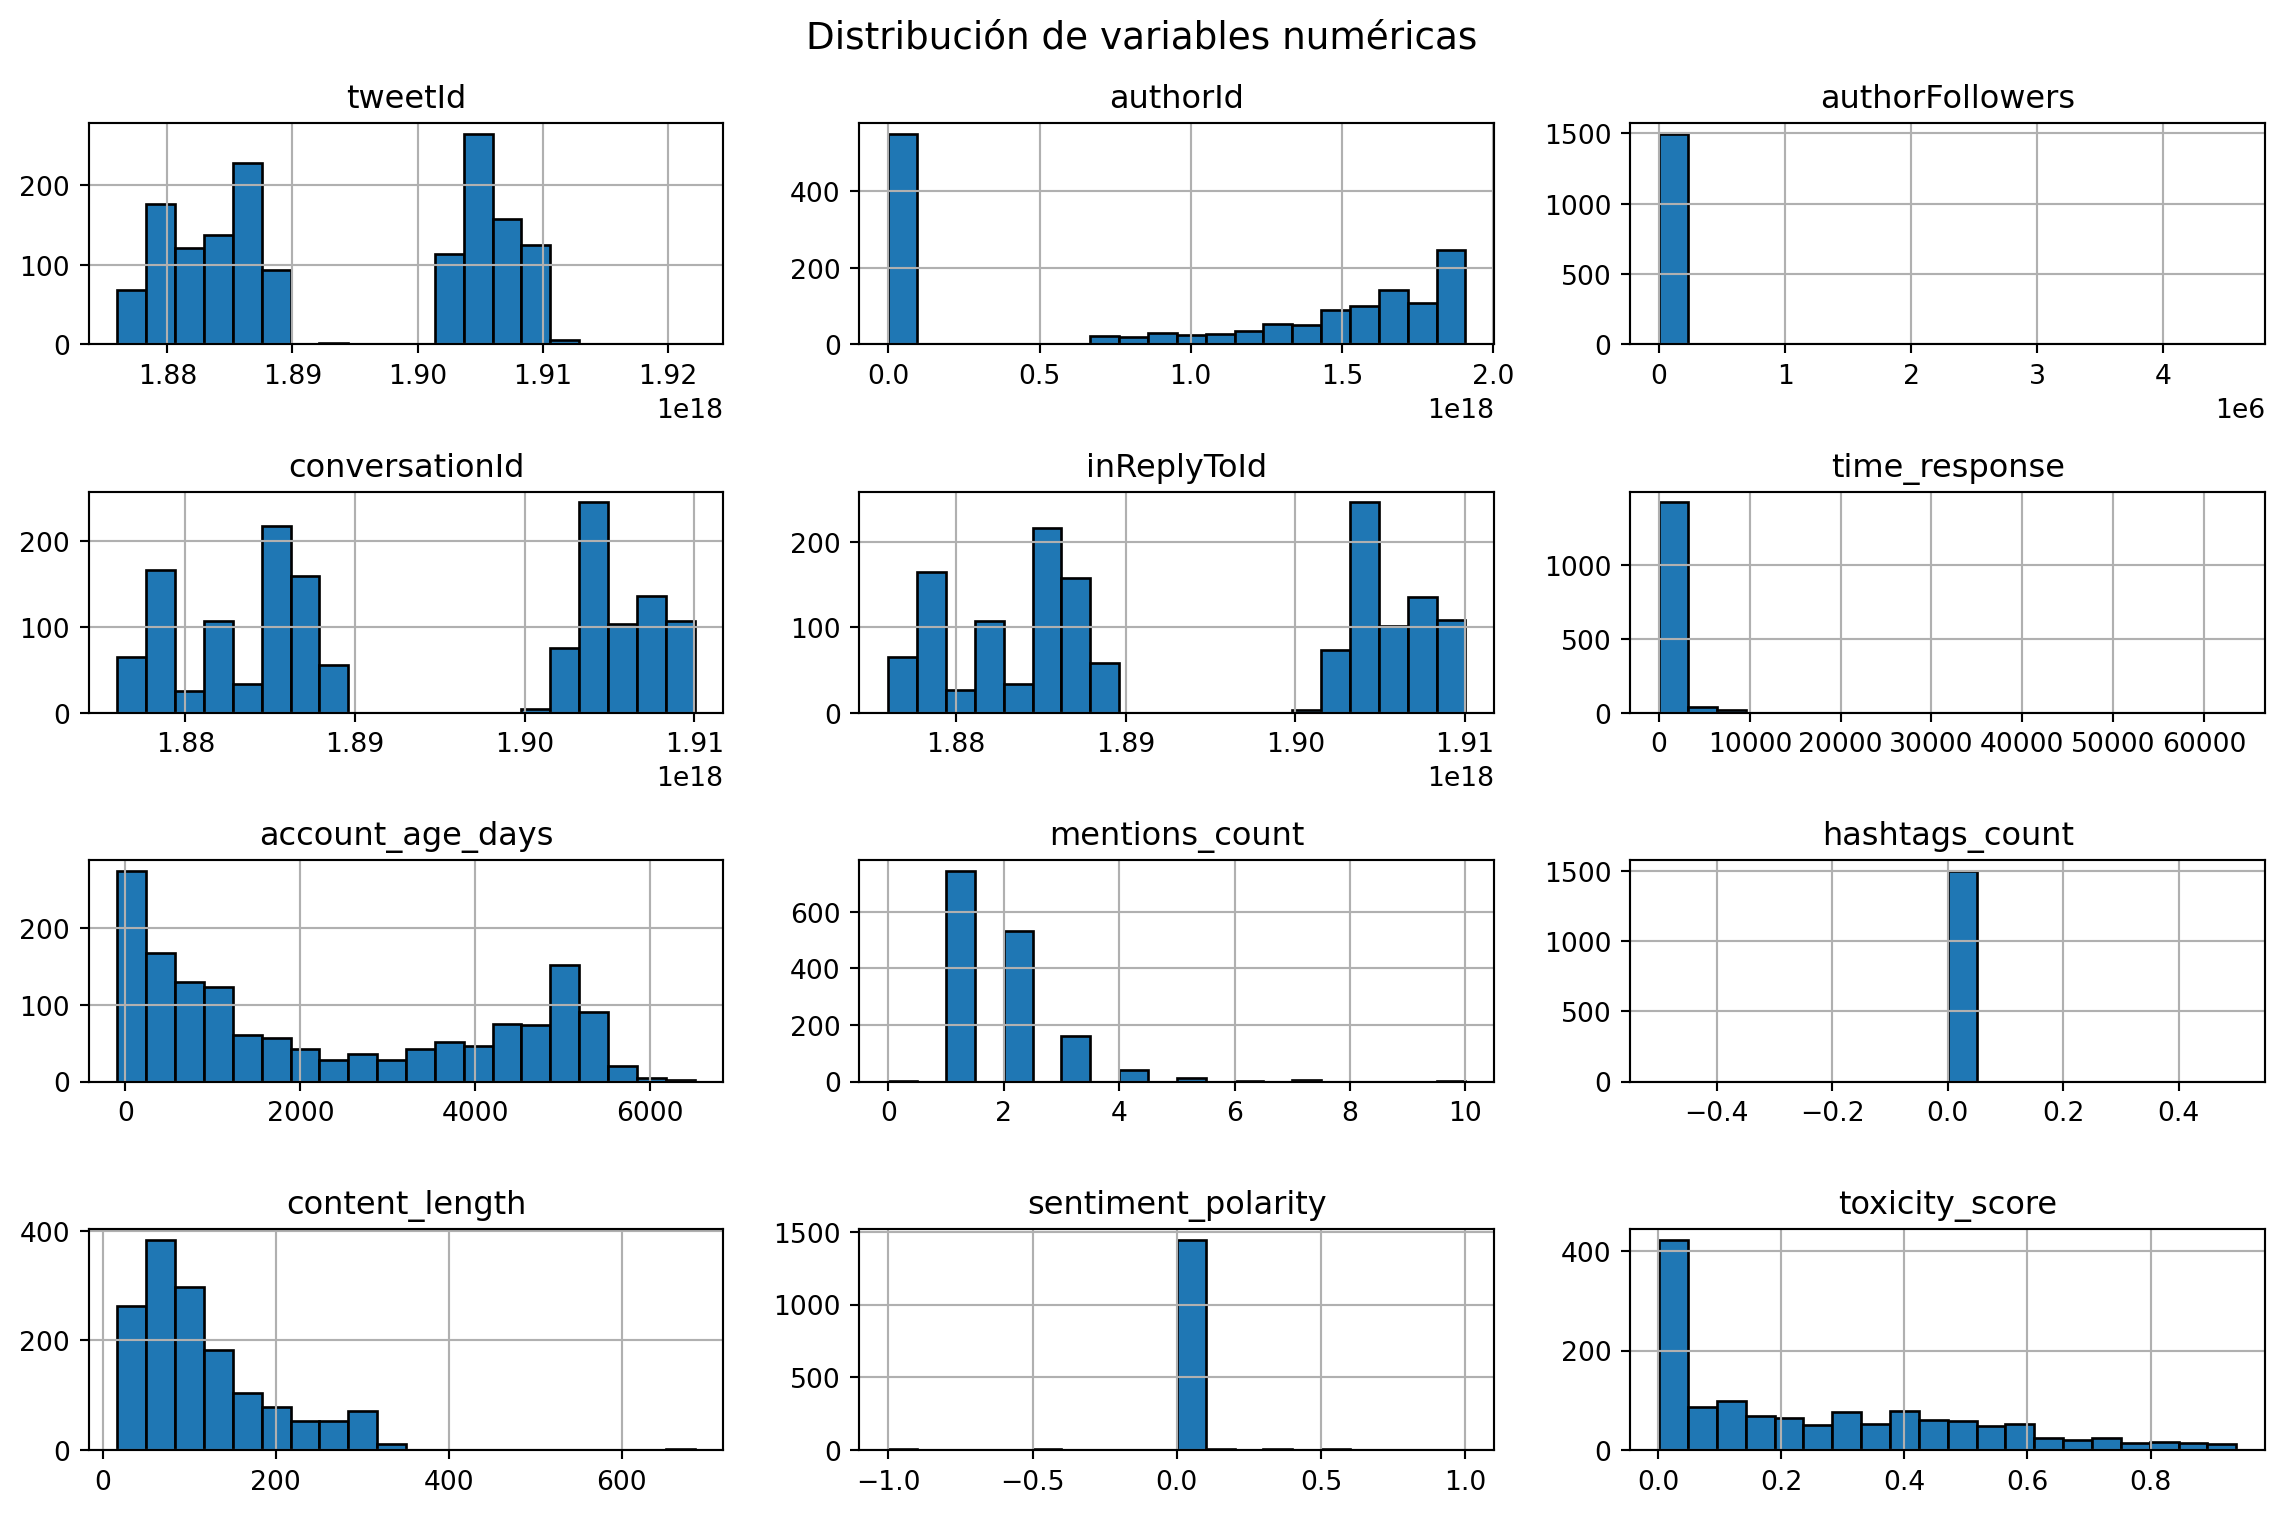

In [5]:
# variables numéricas
num_df = df.select_dtypes(include=['number'])

# Estadísticas básicas
stats = num_df.describe().T
stats['median'] = num_df.median()
stats = stats[['min', 'max', 'mean', 'median', 'std']]

print("Estadísticas descriptivas de las variables numéricas:\n")
display(stats)

# Distribución (histogramas)
print("\n Distribuciones de variables numéricas:")
num_df.hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=14)
plt.tight_layout()
plt.show()

### Distribución de la variable TOXICITY.
Histograma + KDE → muestra la forma de la distribución.

Si la curva está cargada hacia la izquierda o derecha → distribución sesgada.

Si es más o menos simétrica → normal o casi normal.

Boxplot → ayuda a detectar valores atípicos (outliers).

Sesgo (skewness):

0 → sesgo a la derecha (muchos valores bajos, pocos altos).

< 0 → sesgo a la izquierda (muchos valores altos, pocos bajos).

Curtosis:

0 → más concentrada (pico más alto).

< 0 → más aplanada.

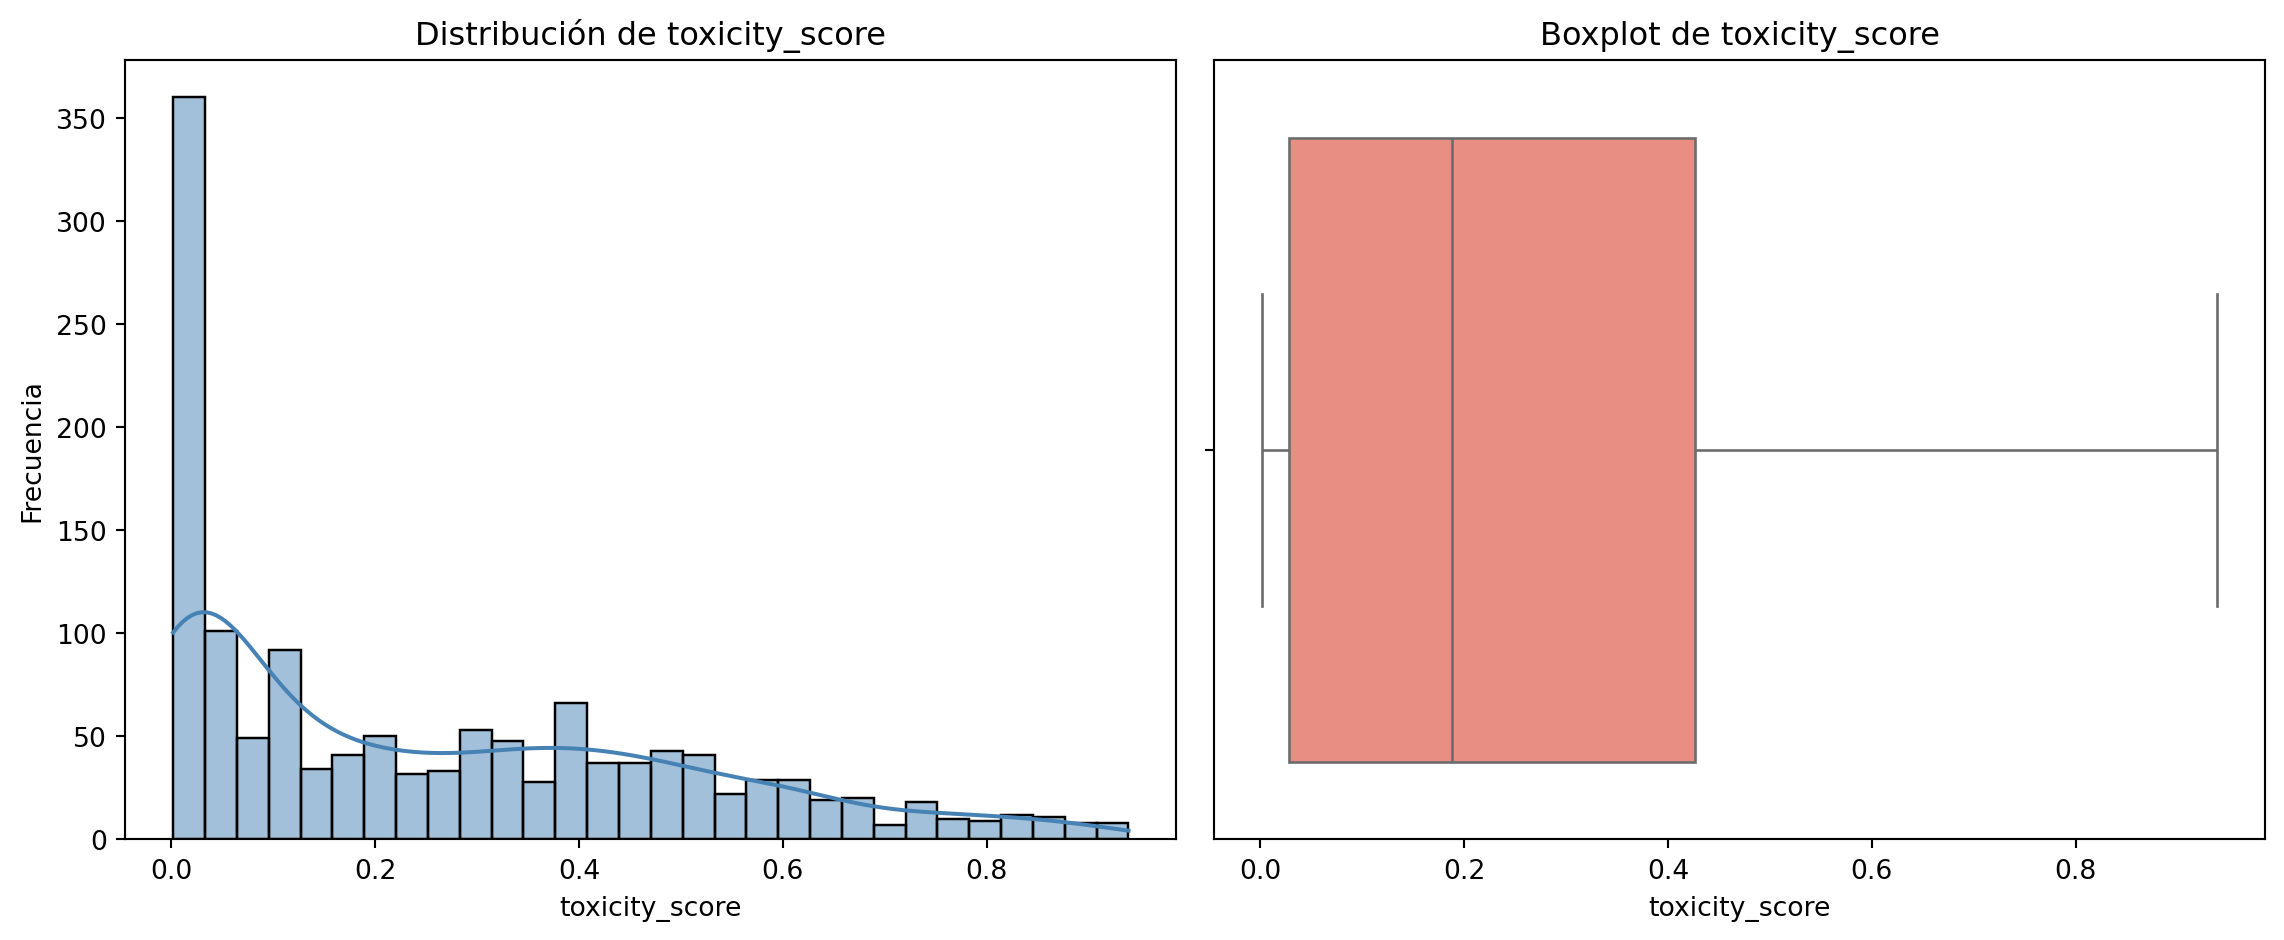

Estadísticas de distribución para 'toxicity_score':
Media: 0.2539
Mediana: 0.1884
Desviación estándar: 0.2439
Sesgo (skewness): 0.7901
Curtosis: -0.3839


In [6]:
# --- Verificamos que la variable exista ---
if 'toxicity_score' in df.columns:
    plt.figure(figsize=(12,5))

    # Histograma + KDE (curva de densidad)
    plt.subplot(1,2,1)
    sns.histplot(df['toxicity_score'], bins=30, kde=True, color='steelblue')
    plt.title('Distribución de toxicity_score')
    plt.xlabel('toxicity_score')
    plt.ylabel('Frecuencia')

    # Boxplot (para detectar outliers)
    plt.subplot(1,2,2)
    sns.boxplot(x=df['toxicity_score'], color='salmon')
    plt.title('Boxplot de toxicity_score')
    plt.xlabel('toxicity_score')

    plt.tight_layout()
    plt.show()

    # Estadísticas complementarias
    skewness = df['toxicity_score'].skew()
    kurtosis = df['toxicity_score'].kurt()
    print(f"Estadísticas de distribución para 'toxicity_score':")
    print(f"Media: {df['toxicity_score'].mean():.4f}")
    print(f"Mediana: {df['toxicity_score'].median():.4f}")
    print(f"Desviación estándar: {df['toxicity_score'].std():.4f}")
    print(f"Sesgo (skewness): {skewness:.4f}")
    print(f"Curtosis: {kurtosis:.4f}")
else:
    print("La columna 'toxicity_score' no existe en el DataFrame.")

### HALLAZGO 1 DE LA EVALUACION DE TOXICITY
La variable toxicity_score muestra una distribución asimétrica positiva, concentrada en valores bajos (mensajes poco tóxicos) y con algunos valores extremos hacia el lado alto, representando pocos mensajes muy tóxicos.
En general, la toxicidad promedio del conjunto de datos es baja y los valores se encuentran bastante dispersos, sin una concentración muy marcada alrededor de la media.

### Detección de valores nulos, duplicados o atípicos.


DETECCIÓN DE DATOS PROBLEMÁTICOS

Columnas con valores nulos:



,Cantidad de nulos
replyTo,10
hashtags,1379
mentions,1
toxicity_score,153


Registros duplicados: 0

Columnas con valores atípicos detectados:



,Cantidad de outliers
authorFollowers,195
time_response,81
mentions_count,63
content_length,77
sentiment_polarity,62


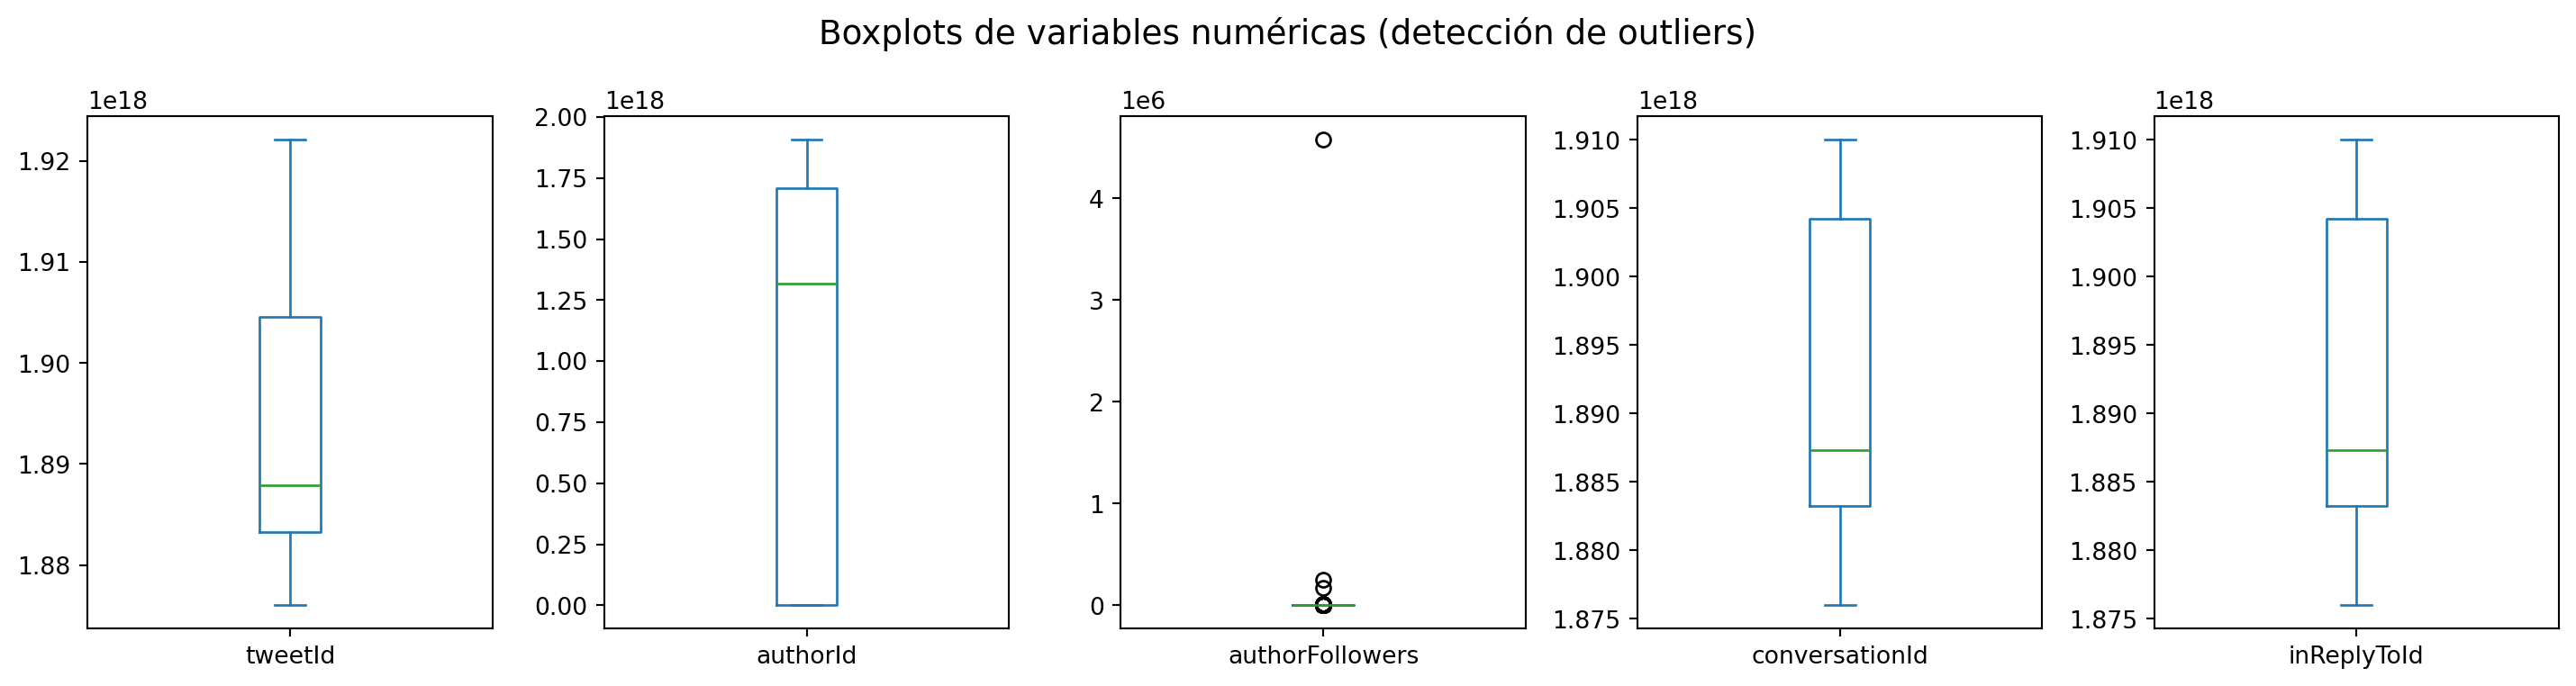

In [7]:
print("DETECCIÓN DE DATOS PROBLEMÁTICOS\n")

# 1 VALORES NULOS
nulos = df.isnull().sum()
nulos = nulos[nulos > 0]
if not nulos.empty:
    print("Columnas con valores nulos:\n")
    display(nulos.to_frame("Cantidad de nulos"))
else:
    print(" No hay valores nulos en el DataFrame.\n")

# 2 VALORES DUPLICADOS
duplicados = df.duplicated().sum()
print(f"Registros duplicados: {duplicados}\n")

# 3 DETECCIÓN DE VALORES ATÍPICOS (OUTLIERS)
num_df = df.select_dtypes(include=['number'])

outliers = {}
for col in num_df.columns:
    Q1 = num_df[col].quantile(0.25)
    Q3 = num_df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    cantidad_outliers = ((num_df[col] < limite_inf) | (num_df[col] > limite_sup)).sum()
    if cantidad_outliers > 0:
        outliers[col] = cantidad_outliers

if outliers:
    print("Columnas con valores atípicos detectados:\n")
    display(pd.DataFrame.from_dict(outliers, orient='index', columns=['Cantidad de outliers']))
else:
    print(" No se detectaron valores atípicos en las variables numéricas.\n")

# 4 VISUALIZACIÓN DE OUTLIERS (Boxplots)
if not num_df.empty:
    num_cols = num_df.columns[:5]  # muestra hasta 5 variables numéricas
    num_df[num_cols].plot(kind='box', subplots=True, layout=(1, len(num_cols)), figsize=(15, 4), sharey=False)
    plt.suptitle("Boxplots de variables numéricas (detección de outliers)", fontsize=14)
    plt.tight_layout()
    plt.show()

### HALLAZGO 2 OUTLIERS

authorId: no debe analizarse como variable numérica continua → solo sirve como identificador.

authorFollowers: presenta outliers reales (usuarios con muchos seguidores).
No son errores, pero sí valores extremadamente altos que podrían distorsionar análisis estadísticos (por ejemplo, al calcular promedios).

### VISUALIZACIONES ADICIONALES

#### Gráficos de barras o conteo para variables categóricas.


C:\Users\Dieg0AkD\AppData\Local\Temp\ipykernel_9088\3562592368.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cats.index, x=top_cats.values, palette='viridis')


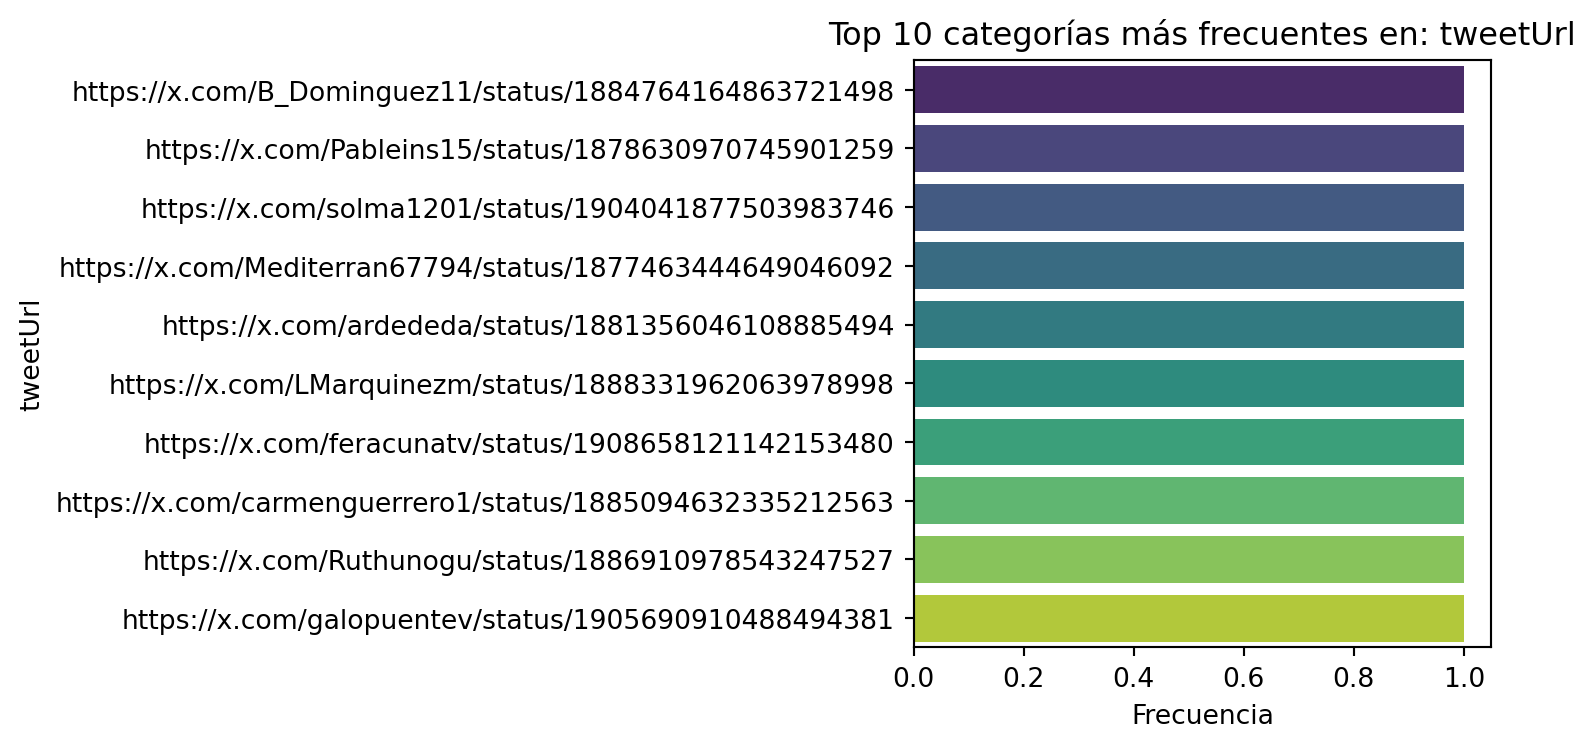

C:\Users\Dieg0AkD\AppData\Local\Temp\ipykernel_9088\3562592368.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cats.index, x=top_cats.values, palette='viridis')
C:\Users\Dieg0AkD\AppData\Local\Temp\ipykernel_9088\3562592368.py:15: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dieg0AkD\AppData\Local\Temp\ipykernel_9088\3562592368.py:15: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


C:\Users\Dieg0AkD\AppData\Local\Temp\ipykernel_9088\3562592368.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
f:\2025\MAST_IA\1.- Fundamentos IA\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
f:\2025\MAST_IA\1.- Fundamentos IA\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


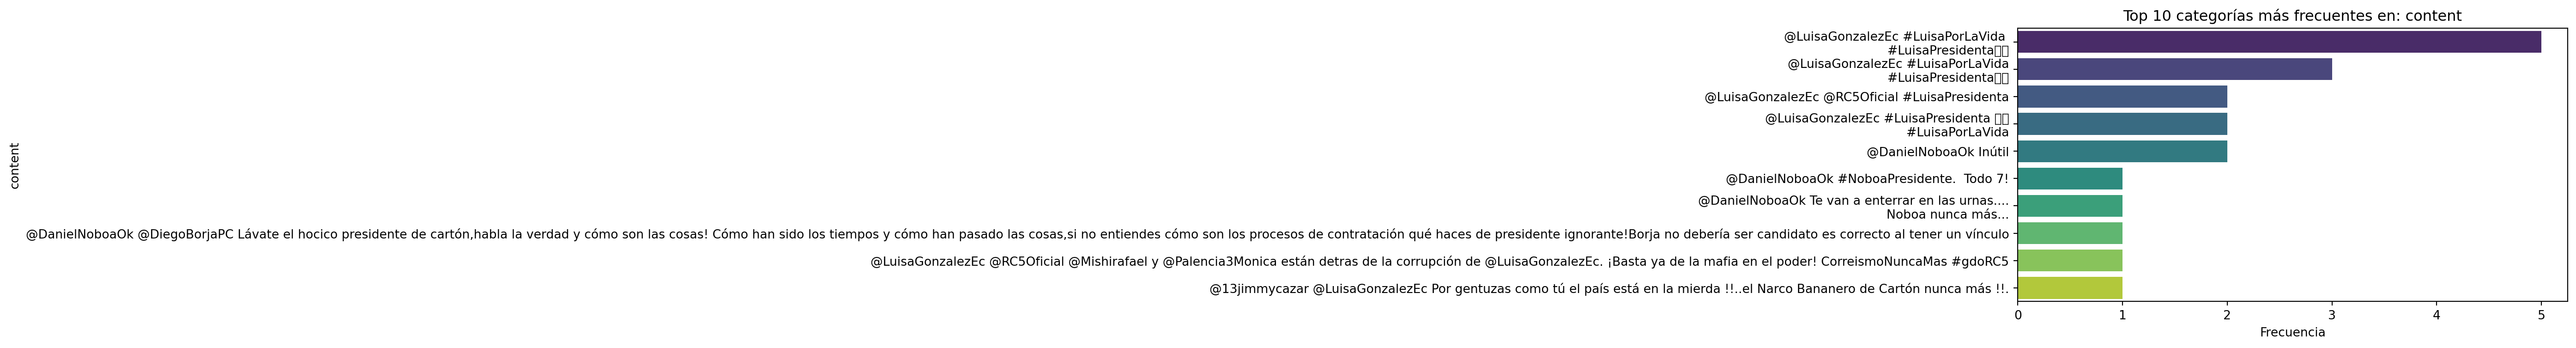

C:\Users\Dieg0AkD\AppData\Local\Temp\ipykernel_9088\3562592368.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cats.index, x=top_cats.values, palette='viridis')


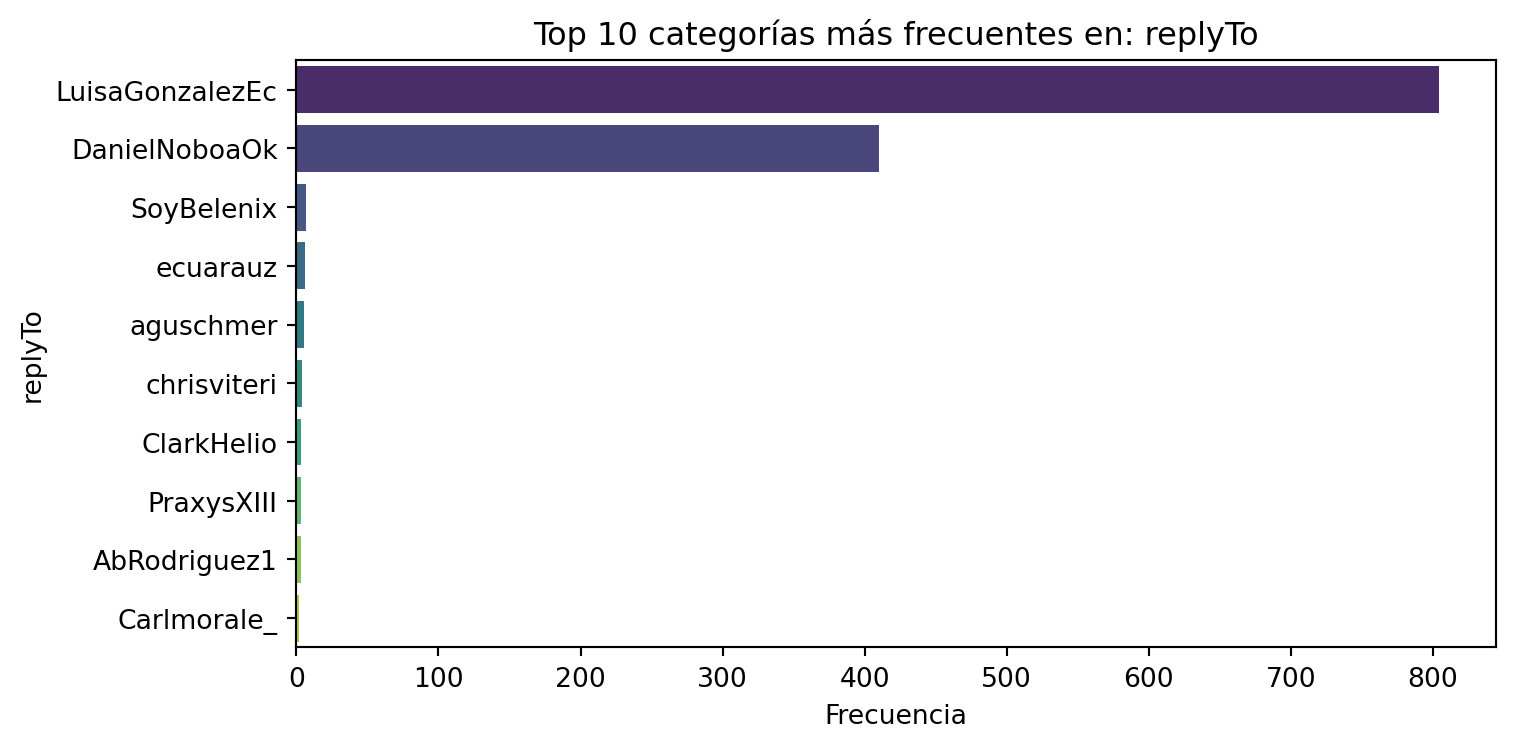

In [8]:
# 1 GRÁFICOS DE BARRAS / CONTEO (variables categóricas)

cat_cols = df.select_dtypes(include=['object', 'category']).columns

if len(cat_cols) > 0:
    for col in cat_cols[:3]:  # graficar hasta 3 variables categóricas
        # Contar categorías y tomar solo las 10 principales
        top_cats = df[col].value_counts().head(10)

        plt.figure(figsize=(8, 4))
        sns.barplot(y=top_cats.index, x=top_cats.values, palette='viridis')
        plt.title(f"Top 10 categorías más frecuentes en: {col}")
        plt.xlabel("Frecuencia")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
else:
    print("No se encontraron variables categóricas para graficar.\n")

### HALLAZGO 3 FRECUENCIA DE LAS CATEGORICAS

Se realizó el análisis de las 3 variables categóricas donde vimos la frecuencia de URL, el contenido y la los replicados, teniendo un contexto para analizar segun la frecuencia de estas categóricas

#### Nube de texto

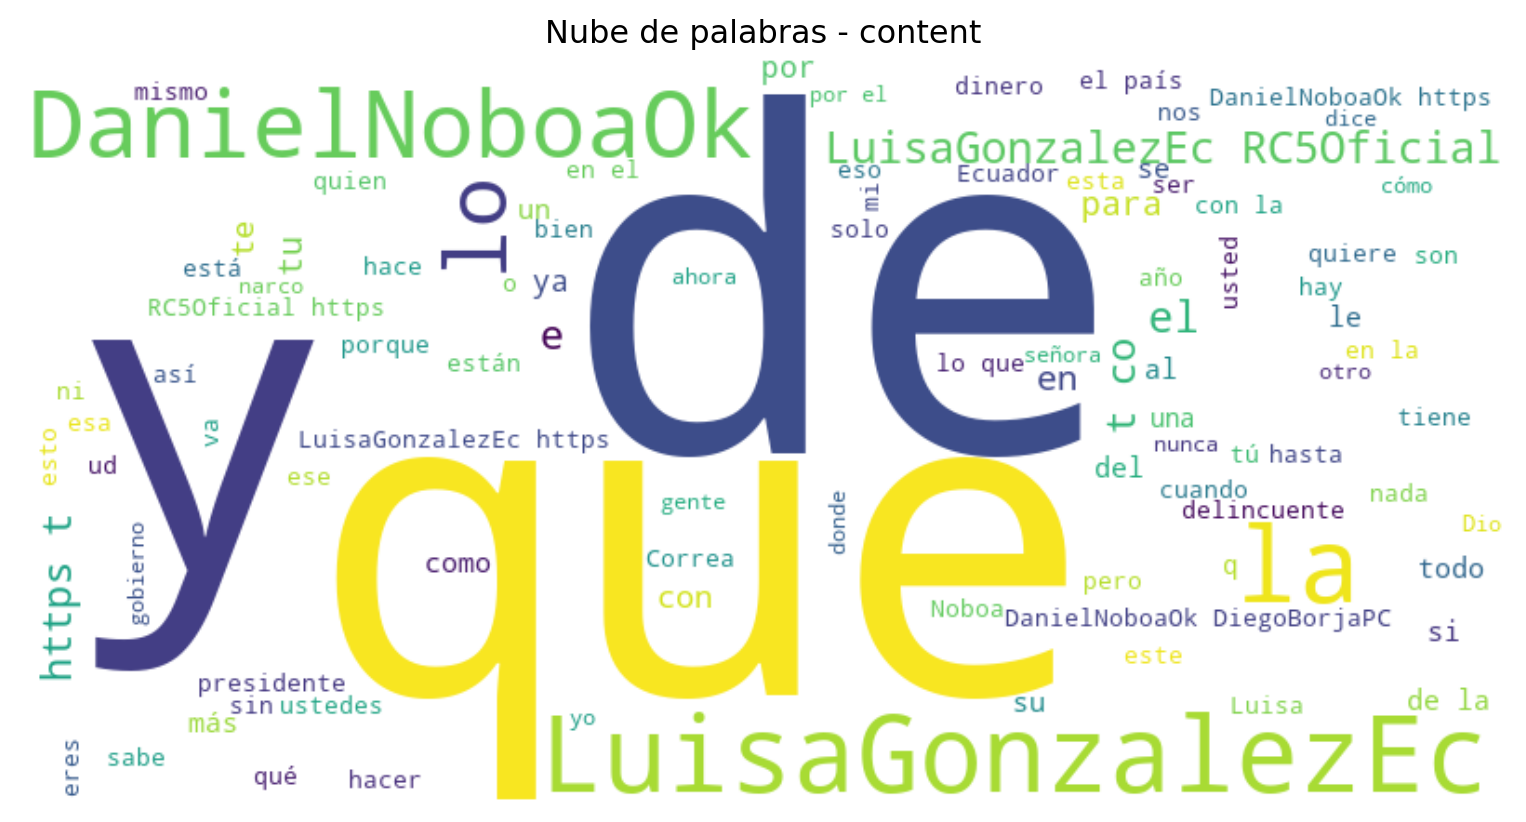

C:\Users\Dieg0AkD\AppData\Local\Temp\ipykernel_9088\3304801442.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comunes, x='Frecuencia', y='Palabra', palette='mako')


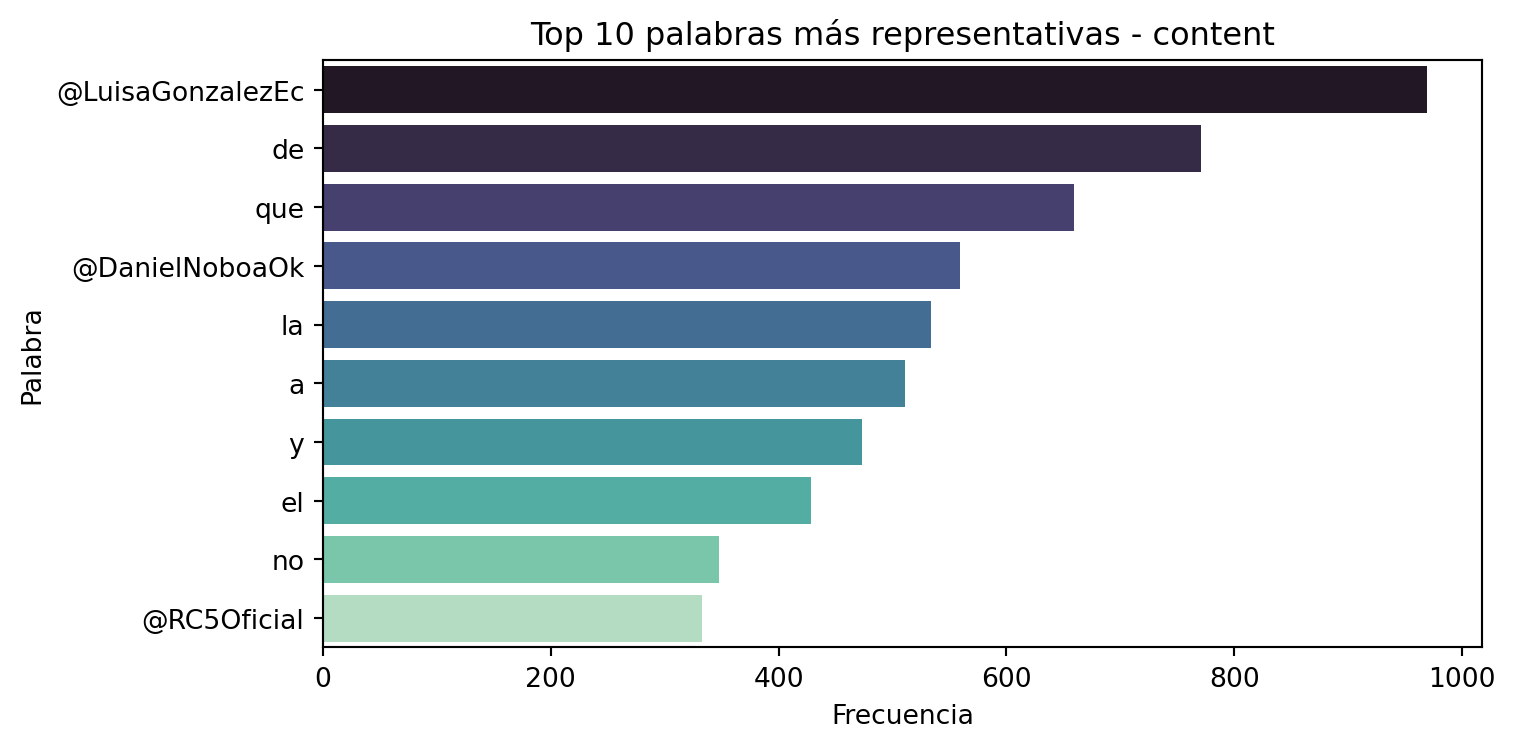

,Palabra,Frecuencia
0,@LuisaGonzalezEc,969
1,de,771
2,que,659
3,@DanielNoboaOk,559
4,la,534
5,a,511
6,y,473
7,el,428
8,no,348
9,@RC5Oficial,333


In [9]:
from wordcloud import WordCloud
from collections import Counter

# Detectar la posible variable de texto
text_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].str.len().mean() > 30]

if len(text_cols) > 0:
    col_texto = text_cols[1]  # usa la segunda columna tipo texto
    texto = " ".join(df[col_texto].dropna().astype(str))

    # --- Generar nube de palabras ---
    plt.figure(figsize=(10,6))
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(texto)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Nube de palabras - {col_texto}")
    plt.show()

    # --- Calcular las 10 palabras más frecuentes ---
    palabras = texto.split()
    frec = Counter(palabras)
    comunes = pd.DataFrame(frec.most_common(10), columns=['Palabra', 'Frecuencia'])

    # --- Gráfico Top 10 ---
    plt.figure(figsize=(8,4))
    sns.barplot(data=comunes, x='Frecuencia', y='Palabra', palette='mako')
    plt.title(f"Top 10 palabras más representativas - {col_texto}")
    plt.tight_layout()
    plt.show()

    # --- Mostrar tabla ---
    display(comunes)
else:
    print("No se detectó ninguna columna de texto para generar la nube de palabras.\n")

# 2. Preprocesamiento y codificación:

### * Limpieza del texto y metadatos.

In [10]:
import re

# Inicializar lematizador y stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('spanish'))  # Español, cambiar si es otro idioma

def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Eliminar menciones (@usuario)
    text = re.sub(r'@\w+', '', text)
    
    # Eliminar hashtags pero mantener la palabra
    text = re.sub(r'#', '', text)
    
    # Eliminar caracteres especiales y números (opcional)
    text = re.sub(r'[^A-Za-záéíóúüñÁÉÍÓÚÜÑ ]+', '', text)
    
    # Convertir a minúsculas
    text = text.lower()
    
    # Tokenizar, eliminar stopwords y lematizar
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words]
    
    # Reconstruir el texto limpio
    return ' '.join(tokens)

# Aplicar limpieza
df['clean_content'] = df['content'].apply(clean_text)

# Crear nuevas columnas opcionales
df['clean_content_length'] = df['clean_content'].apply(len)
df['clean_word_count'] = df['clean_content'].apply(lambda x: len(x.split()))

# Ver ejemplo
print(df[['content', 'clean_content', 'clean_content_length', 'clean_word_count']].head())

                                             content  \
0  @DanielNoboaOk @DiegoBorjaPC Lávate el hocico ...   
1  @DanielNoboaOk De esa arrastrada no te levanta...   
2  @LuisaGonzalezEc @RC5Oficial Protegiendo a los...   
3          @DanielNoboaOk #NoboaPresidente.  Todo 7!   
4  @slider1908 @LuisaGonzalezEc @DianaAtamaint @c...   

                                       clean_content  clean_content_length  \
0  lávate hocico presidente cartónhabla verdad có...                   206   
1              arrastrada levantas nunca chao cartón                    37   
2  protegiendo narcotraficantes criminales violad...                    81   
3                                    noboapresidente                    15   
4                         troll mierda callarse boca                    26   

   clean_word_count  
0                26  
1                 5  
2                 7  
3                 1  
4                 4  


### Aplicación de técnicas como:

#### •	Codificación de texto (TF-IDF, CountVectorizer, u otros).
Se utilizó TF-IDF porque asigna un peso a cada palabra según su frecuencia en el tweet y en todo el corpus.

Las palabras comunes en todos los tweets tienen menor peso.

In [11]:
# --- 1. TF-IDF ---
stop_words = stopwords.words("spanish")
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,   # Número máximo de palabras a considerar
    ngram_range=(1,2),   # Unigrama y bigrama
    stop_words=stop_words # Stopwords en español
)

X_tfidf = tfidf_vectorizer.fit_transform(df['clean_content'])

# Convertir a DataFrame opcionalmente
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF shape:", X_tfidf_df.shape)
print(X_tfidf_df.head())

TF-IDF shape: (1500, 1000)
   abandonado  abre  abril  abrió  abuso  acaba  acaso  aceptar  acuerdos  \
0         0.0   0.0    0.0    0.0    0.0    0.0    0.0      0.0       0.0   
1         0.0   0.0    0.0    0.0    0.0    0.0    0.0      0.0       0.0   
2         0.0   0.0    0.0    0.0    0.0    0.0    0.0      0.0       0.0   
3         0.0   0.0    0.0    0.0    0.0    0.0    0.0      0.0       0.0   
4         0.0   0.0    0.0    0.0    0.0    0.0    0.0      0.0       0.0   

   acá  ...  zorro  zurda  zurdos  época  ósea  última  último  últimos  \
0  0.0  ...    0.0    0.0     0.0    0.0   0.0     0.0     0.0      0.0   
1  0.0  ...    0.0    0.0     0.0    0.0   0.0     0.0     0.0      0.0   
2  0.0  ...    0.0    0.0     0.0    0.0   0.0     0.0     0.0      0.0   
3  0.0  ...    0.0    0.0     0.0    0.0   0.0     0.0     0.0      0.0   
4  0.0  ...    0.0    0.0     0.0    0.0   0.0     0.0     0.0      0.0   

   única  único  
0    0.0    0.0  
1    0.0    0.0  
2    

#### Codificación de variables categóricas (OneHotEncoder, OrdinalEncoder).

In [12]:
categorical_cols = ['authorVerified', 'isReply']  # columnas categóricas simples
ordinal_cols = ['authorUsername']  # ejemplo de columnas con muchas categorías

# --- 1. OneHotEncoder para variables con pocas categorías ---
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat_ohe = ohe.fit_transform(df[categorical_cols])
X_cat_ohe_df = pd.DataFrame(X_cat_ohe, columns=ohe.get_feature_names_out(categorical_cols))

print("OneHotEncoder shape:", X_cat_ohe_df.shape)
print(X_cat_ohe_df.head())

# --- 2. OrdinalEncoder para variables con muchas categorías ---
ord_enc = OrdinalEncoder()
X_cat_ord = ord_enc.fit_transform(df[ordinal_cols])
X_cat_ord_df = pd.DataFrame(X_cat_ord, columns=ordinal_cols)

print("OrdinalEncoder shape:", X_cat_ord_df.shape)
print(X_cat_ord_df.head())

OneHotEncoder shape: (1500, 2)
   authorVerified_False  isReply_True
0                   1.0           1.0
1                   1.0           1.0
2                   1.0           1.0
3                   1.0           1.0
4                   1.0           1.0
OrdinalEncoder shape: (1500, 1)
   authorUsername
0           598.0
1          1324.0
2           541.0
3           824.0
4           456.0


#### •	Escalamiento de variables numéricas (MinMaxScaler, StandardScaler).

No tiene mucho sentido escalar IDs (tweetId, authorId, conversationId, inReplyToId), porque son solo identificadores y no representan magnitudes numéricas útiles para modelado.

Para un pipeline simple, usaremos StandardScaler

In [13]:
numerical_cols = ['authorFollowers', 'time_response', 'account_age_days', 
 'mentions_count', 'hashtags_count', 'content_length', 
 'sentiment_polarity', 'toxicity_score']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df_scaled[numerical_cols].head())

   authorFollowers  time_response  account_age_days  mentions_count  \
0        -0.030469      -0.246138          1.507372        0.292480   
1        -0.030131      -0.310710         -0.439696       -0.764677   
2        -0.029988       0.012709         -1.110733        0.292480   
3        -0.029903      -0.125748          1.353099       -0.764677   
4        -0.030258      -0.247539          0.976491        3.463953   

   hashtags_count  content_length  sentiment_polarity  toxicity_score  
0             0.0        2.484540            0.066024        1.186694  
1             0.0       -0.600610            0.066024        0.709607  
2             0.0        0.070636            0.066024        1.238833  
3             0.0       -0.974959            0.066024       -0.849957  
4             0.0       -0.200444            0.066024        2.428317  


# 3. CLASIFICACIÓN
#### • Transformar el valor de TOXICITY en una variable categórica binaria o multiclase, utilizando un umbral de corte o una estrategia de discretización, debidamente justificada.

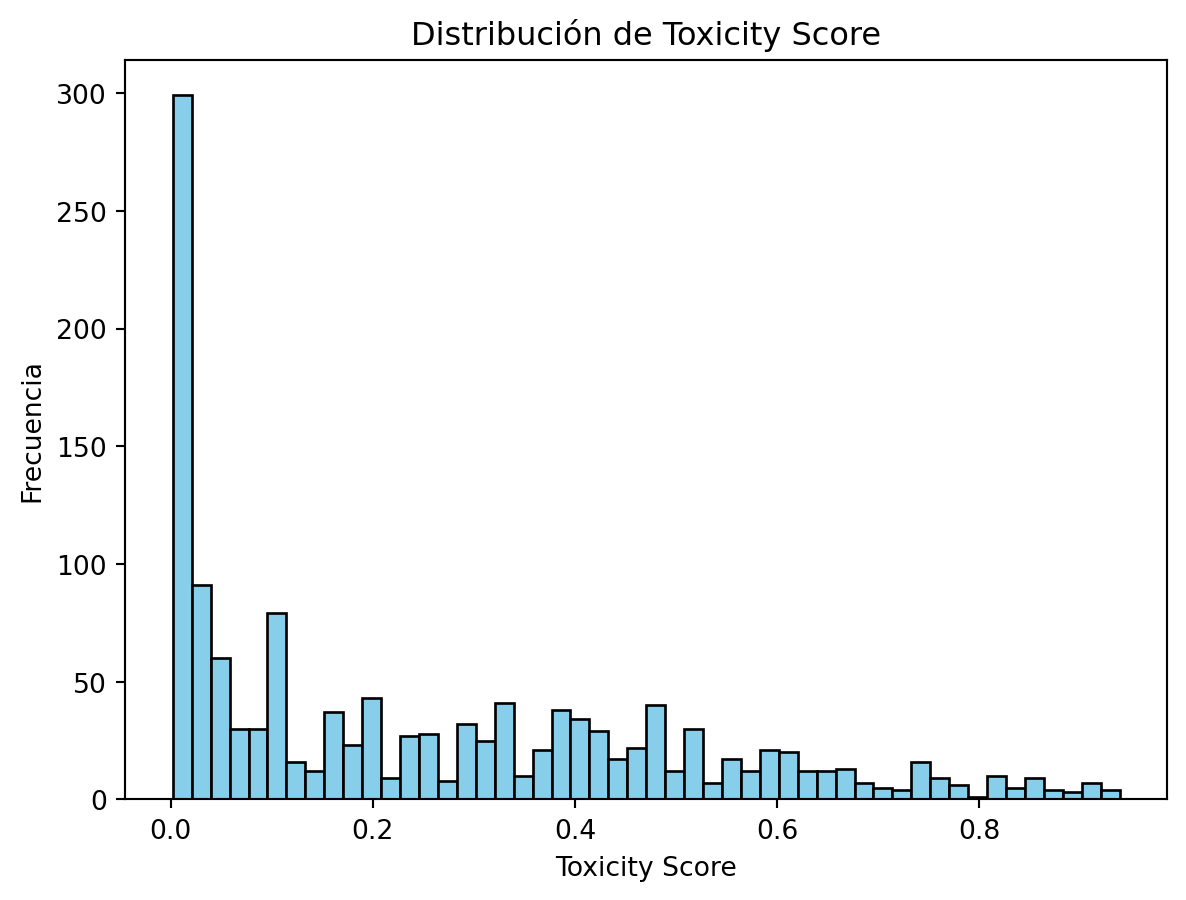

0.0019398858 0.9391453


In [14]:
import matplotlib.pyplot as plt

plt.hist(df['toxicity_score'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Toxicity Score')
plt.ylabel('Frecuencia')
plt.title('Distribución de Toxicity Score')
plt.show()

# Revisar valores mínimo y máximo
print(df['toxicity_score'].min(), df['toxicity_score'].max())

In [15]:
# Crear variable binaria
df['toxicity_label'] = df['toxicity_score'].apply(lambda x: 1 if x >= 0.5 else 0)

# Revisar distribución
print(df['toxicity_label'].value_counts())

toxicity_label
0    1257
1     243
Name: count, dtype: int64


#### •	Seleccionar y aplicar al menos un algoritmo de clasificación supervisada.

Usaré Logistic Regression como algoritmo, ya que es simple, interpretable y funciona bien para clasificación binaria.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Columnas numéricas útiles
numerical_cols = ['authorFollowers', 'time_response', 'account_age_days',
                  'mentions_count', 'hashtags_count', 'content_length',
                  'sentiment_polarity']

# Separar variables predictoras y target
X = df[numerical_cols + ['content']]
y = df['toxicity_label']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion

# Transformador para seleccionar columnas numéricas o de texto
def get_numeric_data(X):
    return X[numerical_cols]

def get_text_data(X):
    return X['content']

numeric_transformer = Pipeline([
    ('selector', FunctionTransformer(get_numeric_data, validate=False)),
    ('scaler', StandardScaler())
])

text_transformer = Pipeline([
    ('selector', FunctionTransformer(get_text_data, validate=False)),
    ('tfidf', TfidfVectorizer(max_features=1000, stop_words=stop_words))
])

# Combinar ambos
preprocessor = FeatureUnion([
    ('num', numeric_transformer),
    ('text', text_transformer)
])

# Pipeline completo
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Entrenar modelo
model_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformer_list,"[('num', ...), ('text', ...)]"
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,func,<function get...002228BB7D940>
,inverse_func,None


####	•	Evaluar el rendimiento del modelo utilizando métricas apropiadas (por ejemplo: Accuracy, Precision, Recall, F1-Score, ROC-AUC).

In [18]:
# Predecir
y_pred = model_pipeline.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       248
           1       1.00      0.10      0.18        52

    accuracy                           0.84       300
   macro avg       0.92      0.55      0.54       300
weighted avg       0.87      0.84      0.79       300

[[248   0]
 [ 47   5]]


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predicciones de clases
y_pred = model_pipeline.predict(X_test)

# Probabilidades para ROC-AUC
y_prob = model_pipeline.predict_proba(X_test)[:, 1]

In [20]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}")

Accuracy : 0.8433
Precision: 1.0000
Recall   : 0.0962
F1-Score : 0.1754
ROC-AUC  : 0.7890


#### •	Presentar los resultados mediante visualizaciones relevantes (matriz de confusión, curva ROC, etc.).

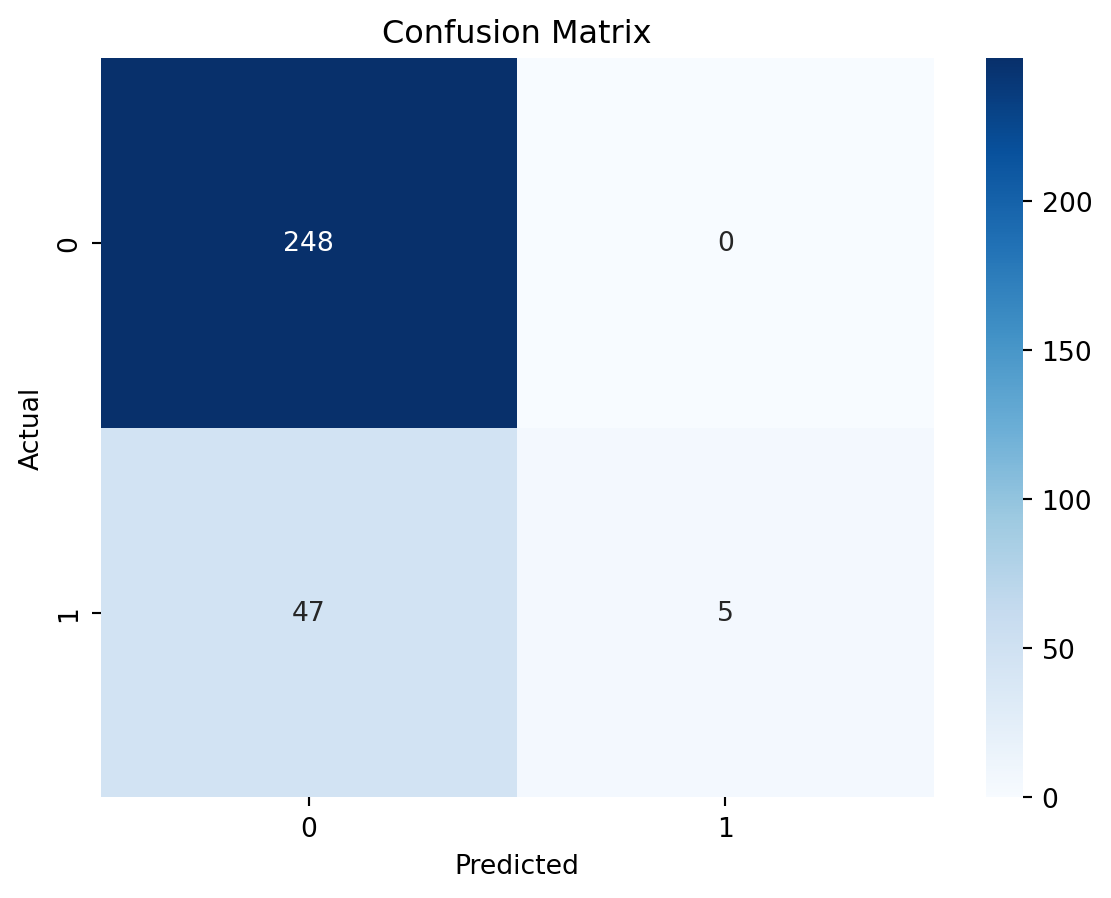

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 4. REGRESION
#### Utilizar el valor continuo de TOXICITY como variable objetivo para un problema de regresión.
## Regresión lineal

Se tienen valores Nan en TOXICY_SCORE por lo que se van eliminar

In [22]:
print("VALORES NAN EN TOXICY SCORE")
print(df['toxicity_label'].isna().sum())
print(df['toxicity_score'].isna().sum())  # si usas regresión

VALORES NAN EN TOXICY SCORE
0
153


In [23]:
df_clean = df.dropna(subset=['toxicity_label'])

In [24]:
df_clean = df.dropna(subset=['toxicity_label'])
Xr = df_clean[numerical_cols + ['content']]
yr = df_clean['toxicity_label']

In [25]:
print(Xr.isna().sum())
print(yr.isna().sum())

authorFollowers       0
time_response         0
account_age_days      0
mentions_count        0
hashtags_count        0
content_length        0
sentiment_polarity    0
content               0
dtype: int64
0


	•	Seleccionar y aplicar al menos un algoritmo de regresión supervisada.

	•	Evaluar el rendimiento del modelo utilizando métricas adecuadas (por ejemplo: MAE, RMSE, R²).

	•	Visualizar los resultados con gráficos interpretables (dispersión real vs predicho, errores residuales, etc.).

In [26]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

In [27]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

# Funciones para seleccionar columnas
def get_numeric_data(X):
    return X[numerical_cols]

def get_text_data(X):
    return X['content']

# Pipeline para variables numéricas
numeric_transformer = Pipeline([
    ('selector', FunctionTransformer(get_numeric_data, validate=False)),
    ('scaler', StandardScaler())
])

# Pipeline para texto
text_transformer = Pipeline([
    ('selector', FunctionTransformer(get_text_data, validate=False)),
    ('tfidf', TfidfVectorizer(max_features=1000, stop_words=stop_words))
])

# Combinar ambos
preprocessor = FeatureUnion([
    ('num', numeric_transformer),
    ('text', text_transformer)
])

# Pipeline completo con regresión lineal
reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar modelo
reg_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformer_list,"[('num', ...), ('text', ...)]"
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,func,<function get...00222F66BD6C0>
,inverse_func,None


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predecir
y_pred = reg_pipeline.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R2   : {r2:.4f}")

MSE  : 5.3382
RMSE : 2.3105
MAE  : 1.4549
R2   : -36.2550


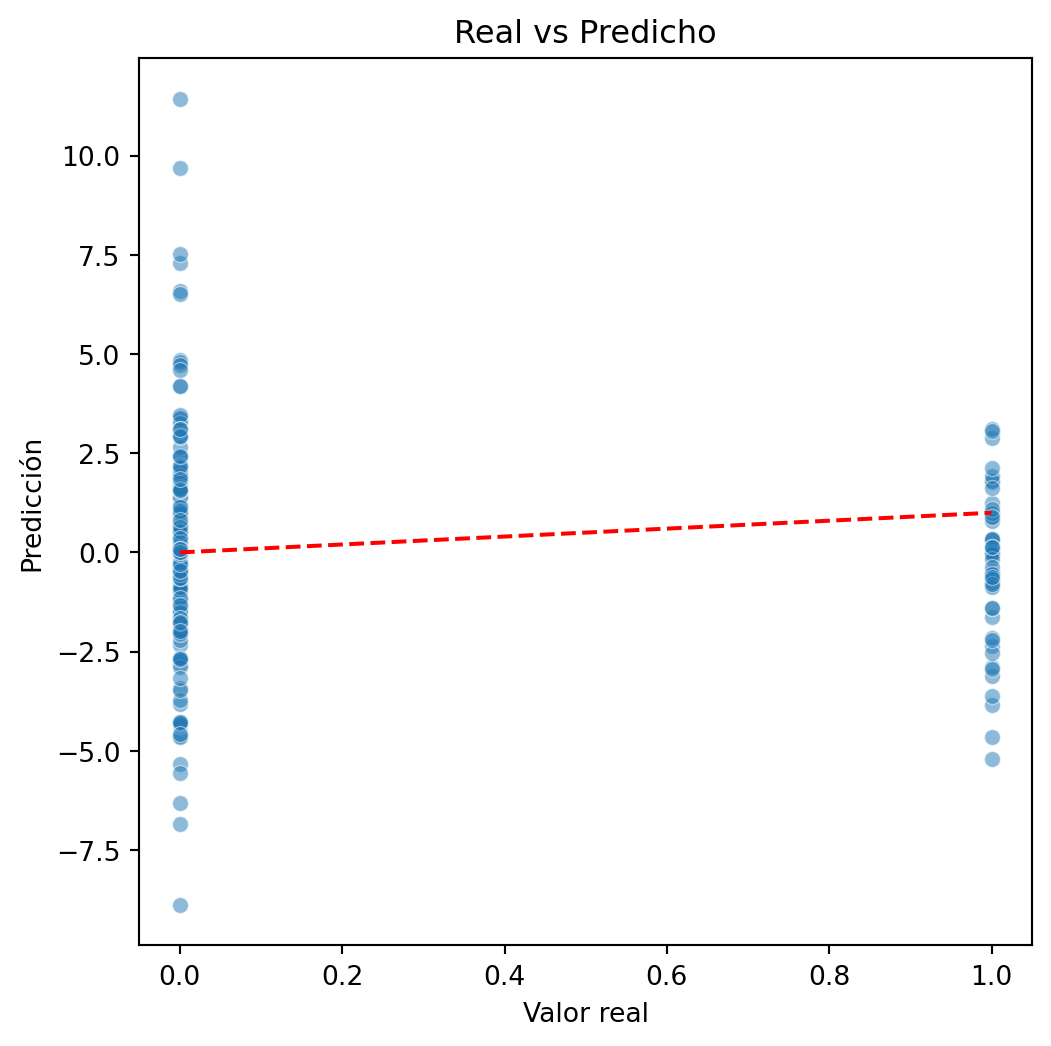

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Real vs Predicho")
plt.show()

### CONCLUSION 
MSE = 5.338 → los errores al cuadrado son bastante grandes, indica que el modelo no está ajustando bien.
RMSE = 2.31 → en promedio, las predicciones se desvían ±2.31 del valor real de toxicity_score.
MAE = 1.45 → en promedio, predicción se desvía ±1.45 del valor real.

Dado quer R² negativo, se probará RandomForestRegressor, que manejan mejor relaciones no lineales y datos sesgados, especialmente con features de texto y métricas de tweets.

## RANDON FOREST

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Columnas numéricas útiles
numerical_cols2 = ['authorFollowers', 'time_response', 'account_age_days',
                  'mentions_count', 'hashtags_count', 'content_length',
                  'sentiment_polarity']

# Limpiar filas con NaN en toxicity_score
df_clean1 = df.dropna(subset=['toxicity_score'])

# Variables predictoras y target
Xr1 = df_clean1[numerical_cols2 + ['content']]
yr1 = df_clean1['toxicity_score']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(Xr1, yr1, test_size=0.2, random_state=42)

In [31]:
# Funciones para seleccionar columnas
def get_numeric_data(X):
    return X[numerical_cols]

def get_text_data(X):
    return X['content']

# Pipeline para variables numéricas
numeric_transformer = Pipeline([
    ('selector', FunctionTransformer(get_numeric_data, validate=False)),
    ('scaler', StandardScaler())
])

# Pipeline para texto
text_transformer = Pipeline([
    ('selector', FunctionTransformer(get_text_data, validate=False)),
    ('tfidf', TfidfVectorizer(max_features=1000, stop_words=stop_words))
])

# Combinar ambos
preprocessor = FeatureUnion([
    ('num', numeric_transformer),
    ('text', text_transformer)
])

In [32]:
reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])

# Entrenar modelo
reg_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformer_list,"[('num', ...), ('text', ...)]"
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,func,<function get...002228E088360>
,inverse_func,None


In [33]:
# Predecir
y_pred = reg_pipeline.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R2   : {r2:.4f}")

MSE  : 0.0395
RMSE : 0.1987
MAE  : 0.1552
R2   : 0.3119


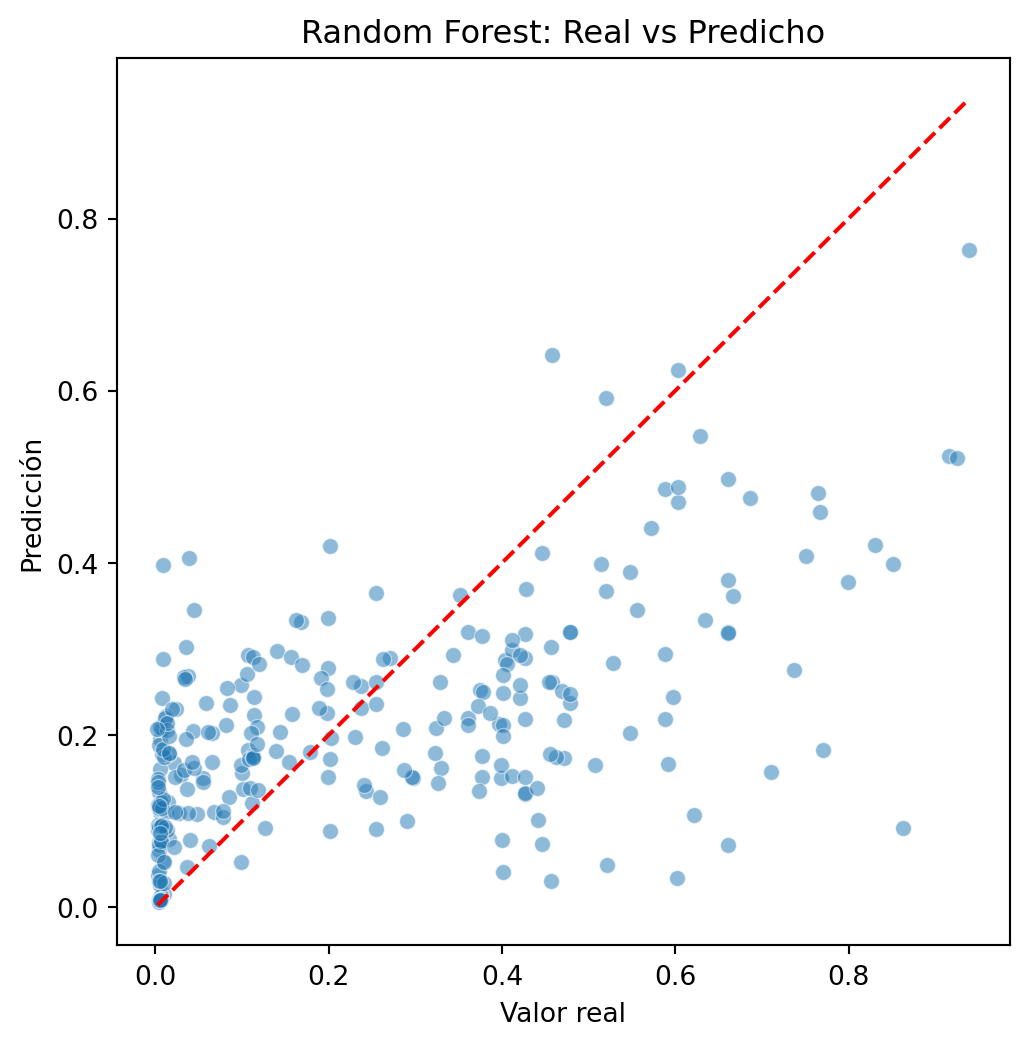

In [34]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Random Forest: Real vs Predicho")
plt.show()

### CONCLUSIÓN
R² = 0.31:
Esto es bajo. Solo el ~31% de la variabilidad de los datos es explicada por Random Forest. Esto indica que, aunque los errores no son enormes, el modelo no captura bien las relaciones entre variables. Existe mucho ruido o falten variables

# 5 CLUSTERIZACIÓN


In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Columnas numéricas útiles
numerical_cols = ['authorFollowers', 'time_response', 'account_age_days',
                  'mentions_count', 'hashtags_count', 'content_length',
                  'sentiment_polarity']

# Limpiar NaN si existen
df_clean = df.dropna(subset=numerical_cols + ['content', 'toxicity_label'])

# Escalar variables numéricas
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df_clean[numerical_cols])

# Transformar texto con TF-IDF
tfidf = TfidfVectorizer(max_features=500, stop_words=stop_words)
X_text = tfidf.fit_transform(df_clean['content']).toarray()

# Combinar numéricas + texto
X_clustering = np.hstack([X_num_scaled, X_text])

#### METODO DEL CODO

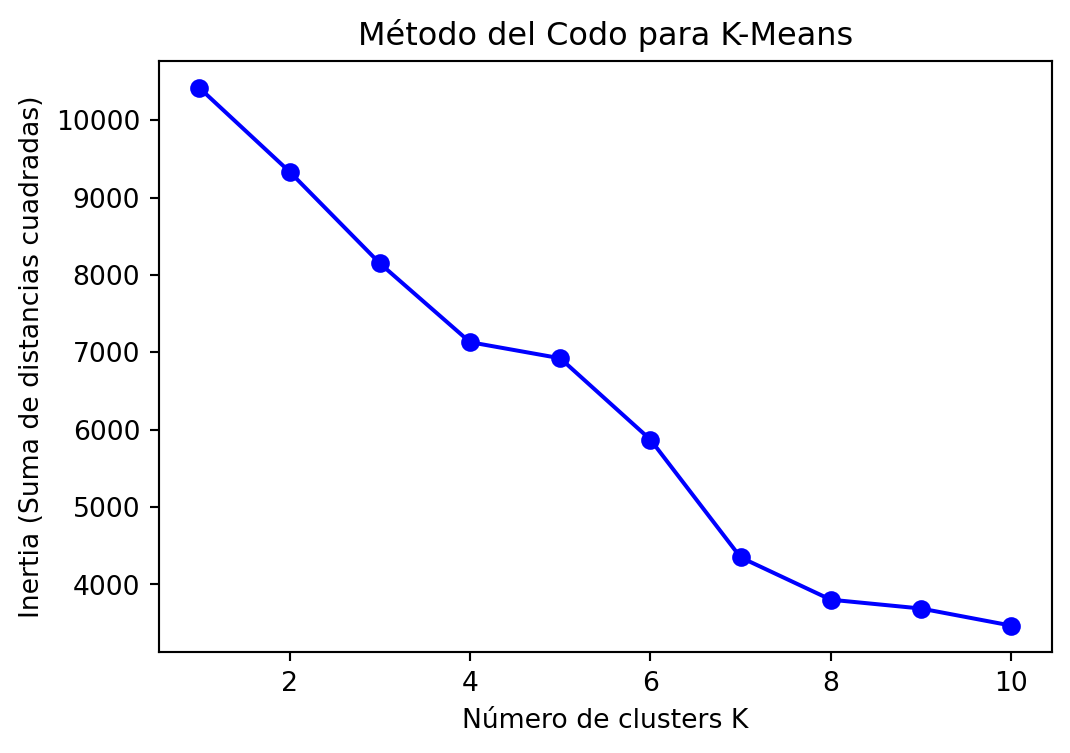

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)  # Probar de 1 a 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

# Graficar
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'o-', color='blue')
plt.xlabel('Número de clusters K')
plt.ylabel('Inertia (Suma de distancias cuadradas)')
plt.title('Método del Codo para K-Means')
plt.show()

#### METODO SILHOUTTE SCORE

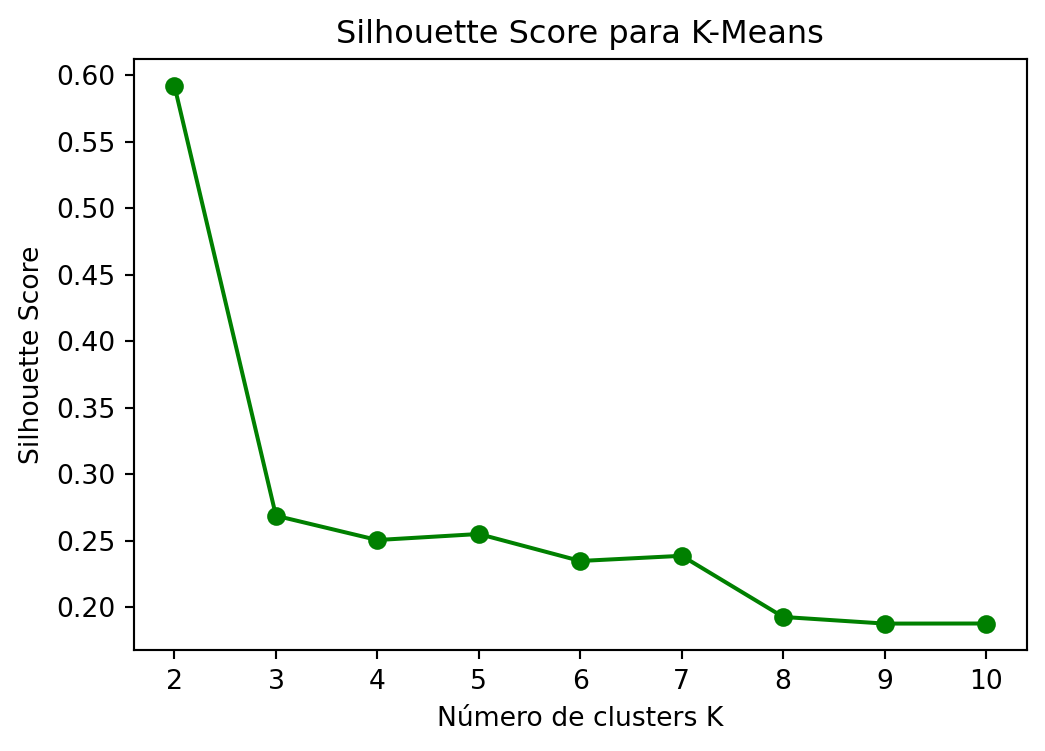

In [37]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2, 11):  # silhouette no funciona con K=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_clustering)
    sil = silhouette_score(X_clustering, labels)
    sil_scores.append(sil)

# Graficar
plt.figure(figsize=(6,4))
plt.plot(range(2,11), sil_scores, 'o-', color='green')
plt.xlabel('Número de clusters K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para K-Means')
plt.show()

Como se puede observar an las dos gráficas el K=2 es la más óptima para el análisis

In [38]:
from sklearn.cluster import KMeans

# Definir número de clusters
k = 2  # Ajustable según exploración
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_clustering)

# Añadir clusters al DataFrame
df_clean['cluster'] = clusters

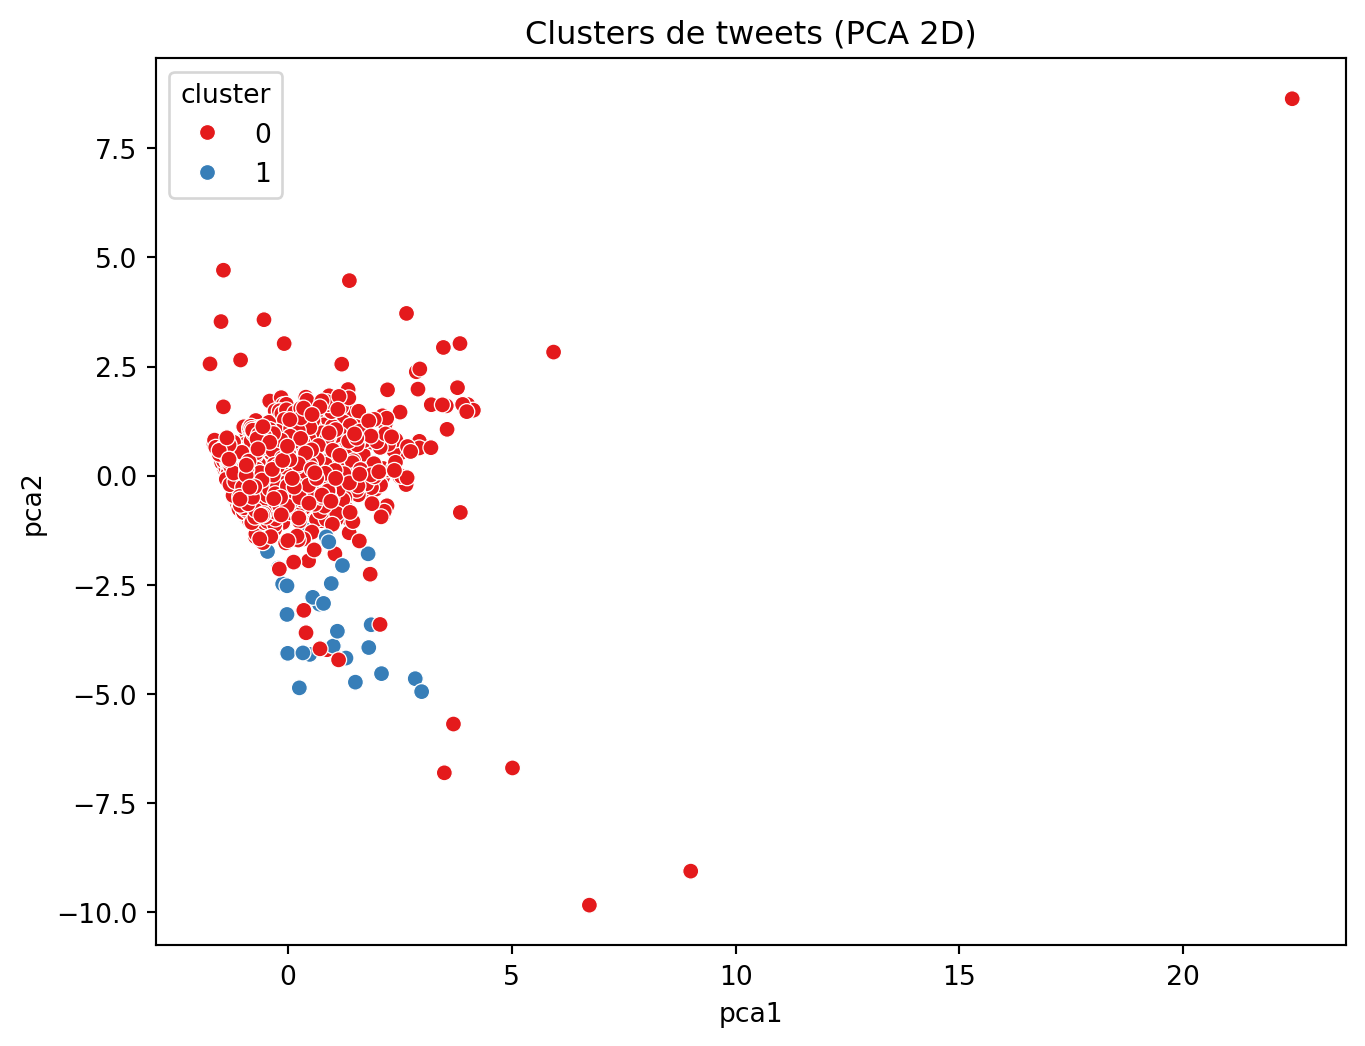

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reducir a 2 dimensiones
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_clustering)

df_clean['pca1'] = X_pca[:, 0]
df_clean['pca2'] = X_pca[:, 1]

# Graficar clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='pca1', y='pca2', hue='cluster', palette='Set1')
plt.title('Clusters de tweets (PCA 2D)')
plt.show()

In [40]:
# Tabla de contingencia
comparison = pd.crosstab(df_clean['cluster'], df_clean['toxicity_label'])
print(comparison)

toxicity_label     0    1
cluster                  
0               1248  225
1                  9   18


#### Reflexión
Si un cluster tiene mayoría de toxicity_label=1, probablemente captura tweets más tóxicos.

Si los clusters están mezclados, el clustering detecta patrones distintos a la toxicidad (estructura del texto, número de seguidores, hashtags).

Los clusters permiten explorar subgrupos naturales sin usar la etiqueta.

# 6 CONCLUSIONES

#### •	Reflexionar sobre la calidad de los datos, la utilidad del target generado, el rendimiento de los modelos y los patrones encontrados.

1. Calidad de los datos

Variables numéricas: Se utilizaron variables como authorFollowers, time_response, account_age_days, mentions_count, hashtags_count, content_length, sentiment_polarity y toxicity_score. Es importante destacar que algunas de estas variables pueden contener valores atípicos o distribuciones sesgadas que podrían afectar el rendimiento del modelo. Por ejemplo, una alta cantidad de seguidores podría no correlacionarse directamente con la toxicidad del contenido.

Variable objetivo (toxicity_score): Esta variable continua fue transformada en una variable categórica binaria (toxicity_label) utilizando un umbral de corte. Sin embargo, la elección del umbral puede ser subjetiva y afectar la precisión del modelo. Además, la distribución de la variable toxicity_score podría estar sesgada, lo que podría influir en la efectividad de la clasificación.

2. Utilidad del target generado

Clasificación binaria: La conversión de toxicity_score en una variable binaria facilita la interpretación y aplicación del modelo en escenarios prácticos, como la moderación de contenido en redes sociales. Sin embargo, esta simplificación puede llevar a la pérdida de matices importantes presentes en la escala continua original.

3. Rendimiento de los modelos

Modelos aplicados: Se implementaron modelos como Random Forest Regressor y K-Means para abordar el problema desde diferentes enfoques.

Resultados obtenidos: Las métricas de evaluación, como MSE, RMSE, MAE y R², indicaron que el modelo de regresión no logró un rendimiento óptimo. Por ejemplo, un R² negativo sugiere que el modelo no es mejor que una simple media de la variable objetivo.

Clustering: El análisis de clustering reveló patrones interesantes, aunque la relación con la variable objetivo toxicity_label no fue clara, lo que sugiere que los clusters podrían estar capturando otros aspectos del contenido de los tweets.

#### 	•	Proponer mejoras o pasos futuros.

1. Mejora en la calidad de los datos

Manejo de valores atípicos: Implementar técnicas de detección y tratamiento de outliers en las variables numéricas para mejorar la calidad del modelo.

Balanceo de clases: Si la variable toxicity_label está desbalanceada, aplicar técnicas como sobremuestreo (SMOTE) o submuestreo para equilibrar las clases y mejorar el rendimiento del modelo.

2. Optimización de modelos

Hiperparámetros: Realizar una búsqueda de hiperparámetros utilizando GridSearchCV o RandomizedSearchCV para encontrar la configuración óptima del modelo.

Modelos avanzados: Explorar el uso de modelos más complejos como XGBoost, LightGBM o redes neuronales, que pueden manejar relaciones no lineales y grandes volúmenes de datos de manera más eficiente.

3. Evaluación y validación

Validación cruzada: Implementar técnicas de validación cruzada para obtener una estimación más robusta del rendimiento del modelo y evitar el sobreajuste.

Métricas adicionales: Además de las métricas tradicionales, considerar el uso de métricas como el área bajo la curva ROC (AUC-ROC) y la matriz de confusión para evaluar mejor el rendimiento del modelo en tareas de clasificación.

4. Análisis de clustering

Interpretación de clusters: Realizar un análisis más profundo de los clusters obtenidos para entender qué características están agrupando los tweets y cómo se relacionan con la toxicidad del contenido.

Modelos de clustering jerárquico: Explorar el uso de modelos de clustering jerárquico, como Agglomerative Clustering, para obtener una visión más detallada de la estructura de los datos.